<h1>2022.05.04. 강의 시간내 실습 - (2)</h1>

In [99]:
import warnings

warnings.filterwarnings('ignore')

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [101]:
mushroom = pd.read_csv("C:/ai_dataset/mushrooms.csv")

In [102]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in mushroom.columns :
    mushroom[i] = le.fit_transform(mushroom[i])

In [104]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [105]:
X = mushroom.drop('class',axis=1)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [106]:
y = mushroom['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [108]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [109]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

True
True
False
False


In [110]:
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

In [111]:
## from sklearn.impute import SimpleImputer

## imputer = SimpleImputer(strategy='mean')

## X_train = imputer.fit_transform(X_train)
## X_test = imputer.transform(X_test)

In [112]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [126]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (22,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 64)                1472      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_68 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,618
Trainable params: 3,618
Non-trainable params: 0
_________________________________________________________________


In [127]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
191/191 [==============================] - 3s 6ms/step - loss: 0.2823 - mse: 0.2823 - val_loss: 0.2503 - val_mse: 0.2503
Epoch 2/100
191/191 [==============================] - 1s 4ms/step - loss: 0.2542 - mse: 0.2542 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 3/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2501 - mse: 0.2501 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 4/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 5/100
191/191 [==============================] - 1s 4ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 6/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 7/100
191/191 [==============================] - 1s 4ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - 

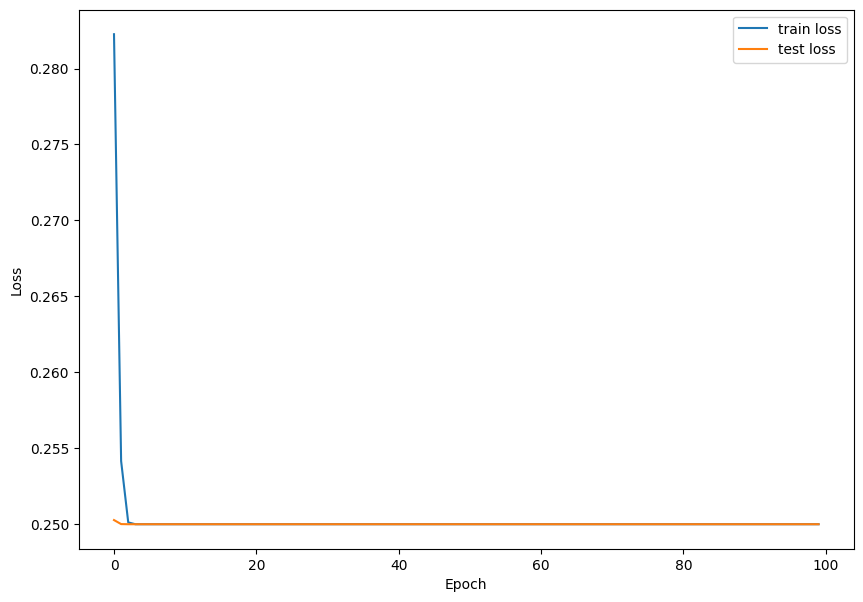

In [128]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

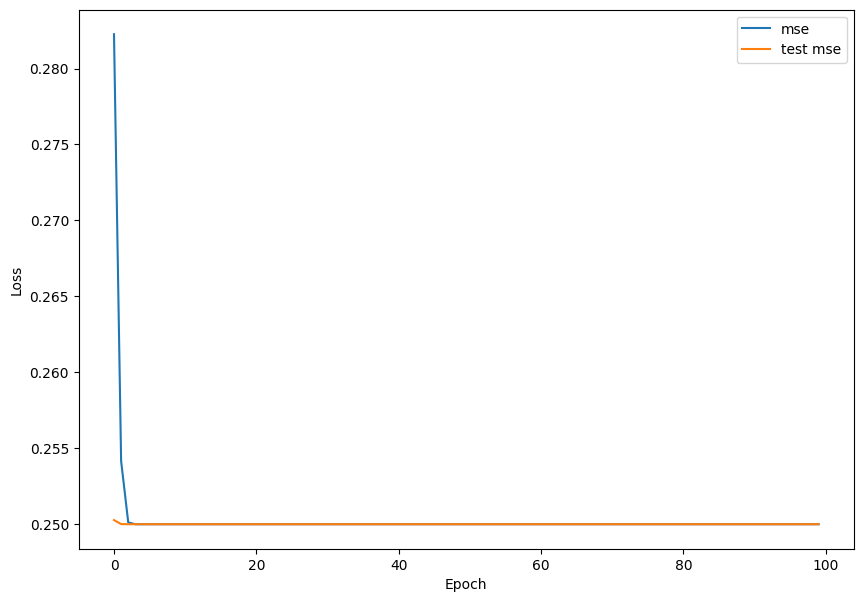

In [129]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()